In [1]:
import numpy as np

In [2]:
def do_add(ll, ii_1, ii_2, ii_3, imme_bool):
    if not imme_bool:
        try:
            ll[ii_3] = ii_1 + ii_2
        except:
            print((ii_1, ii_2, ii_3))
            print(ll)
    return 4
    
def do_mul(ll, ii_1, ii_2, ii_3, imme_bool):
    if not imme_bool:
        ll[ii_3] = ii_1 * ii_2
    return 4

def do_store(ll, ii_1, inp_val, imme_bool):
    if not imme_bool:
        ll[ii_1] = inp_val
    return 2

def do_output(ii_1, verbose):
    if verbose:
        print(ii_1)
    return 2

def jump_if_true(ii_1, ii_2, cur):
    if ii_1:
        return ii_2 
    return cur + 3

def jump_if_false(ii_1, ii_2, cur):
    if not ii_1:
        return ii_2 
    return cur + 3

def do_less_than(ll, ii_1, ii_2, ii_3):
    if ii_1 < ii_2:
        ll[ii_3] = 1
    else:
        ll[ii_3] = 0
    return 4

def do_equals(ll, ii_1, ii_2, ii_3):
    if ii_1 == ii_2:
        ll[ii_3] = 1
    else:
        ll[ii_3] = 0
    return 4

def do_adjust_relative_base(ii_1, rel_index, cur):
    return cur + 2, rel_index + ii_1

def set_up_single(jj, ll, cur, rel_index, pos_code=False):   
    # 0: position mode, use value as pointer
    # 1: immediate mode, use value as int
    # 2: relative mode, use value as pointer with offset
    param = str(ll[cur])[:-2]
    if len(param) >=jj and int(param[len(param)-jj]) == 1: # immediate
        return ll[cur+jj], True
    elif len(param) >=jj and int(param[len(param)-jj]) == 2: # relative
        offset = rel_index
    else:
        offset = 0
    if pos_code:
        assert(cur+jj >= 0)
        return ll[cur+jj]+offset, False
    else:
        assert(cur+jj >= 0)
        assert(ll[cur+jj]+offset >= 0)
        return ll[ll[cur+jj]+offset], False

def set_up_inputs_len_3(ll, cur, rel_index):
    ii_3, imme_bool = set_up_single(3, ll, cur, rel_index, pos_code=True)
    ii_2, _ = set_up_single(2, ll, cur, rel_index)
    ii_1, _ = set_up_single(1, ll, cur, rel_index)
    return ii_1, ii_2, ii_3, imme_bool

def get_inp_val(inp_index, inp_val):
    cur_inp_val = inp_val[inp_index]
    return cur_inp_val, inp_index + 1
    
    
def run_computer(ll, inp_val, verbose=True, out_val=[], 
                 cur=0, inp_index=0, rel_index=0):
    # Provide all inputs so computer can be restarted from previous settings
    
    # Extra memory needs to be provided by appending ll before first starting the computer
    
    while ll[cur] % 100 != 99:
        
        if ll[cur] % 100 == 1:
            ii_1, ii_2, ii_3, imme_bool = set_up_inputs_len_3(ll, cur, rel_index)
            cur = cur + do_add(ll, ii_1, ii_2, ii_3, imme_bool)
        elif ll[cur] % 100 == 2:
            ii_1, ii_2, ii_3, imme_bool = set_up_inputs_len_3(ll, cur, rel_index)
            cur = cur + do_mul(ll, ii_1, ii_2, ii_3, imme_bool)
        elif ll[cur] % 100 == 3:
            if len(inp_val) <= inp_index: # Wait till other machines have run so input is available
                return [cur, inp_index, rel_index], False
            ii_1, imme_bool = set_up_single(1, ll, cur, rel_index, pos_code=True)
            cur_inp_val, inp_index = get_inp_val(inp_index, inp_val)
            cur = cur + do_store(ll, ii_1, cur_inp_val, imme_bool)
        elif ll[cur] % 100 == 4:
            ii_1, imme_bool = set_up_single(1, ll, cur, rel_index, pos_code=False)
            last_output = ii_1
            out_val.append(last_output)
            cur = cur + do_output(ii_1, verbose)
        elif ll[cur] % 100 == 5:
            ii_1, _ = set_up_single(1, ll, cur, rel_index)
            ii_2, _ = set_up_single(2, ll, cur, rel_index)
            cur = jump_if_true(ii_1, ii_2, cur)
        elif ll[cur] % 100 == 6:
            ii_1, _ = set_up_single(1, ll, cur, rel_index)
            ii_2, _ = set_up_single(2, ll, cur, rel_index)
            cur = jump_if_false(ii_1, ii_2, cur)
        elif ll[cur] % 100 == 7:
            ii_1, ii_2, ii_3, imme_bool = set_up_inputs_len_3(ll, cur, rel_index)
            cur = cur + do_less_than(ll, ii_1, ii_2, ii_3)
        elif ll[cur] % 100 == 8:
            ii_1, ii_2, ii_3, imme_bool = set_up_inputs_len_3(ll, cur, rel_index)
            cur = cur + do_equals(ll, ii_1, ii_2, ii_3)
        elif ll[cur] % 100 == 9:
            ii_1, _ = set_up_single(1, ll, cur, rel_index)
            cur, rel_index = do_adjust_relative_base(ii_1, rel_index, cur)
        else:
            print(ll)
            raise ValueError
#     return ll
    return last_output, True
    

In [3]:
# Parts one and two
inp_program = [3,8,1005,8,324,1106,0,11,0,0,0,104,1,104,0,3,8,102,-1,8,10,101,1,10,10,4,10,1008,8,0,10,4,10,1002,8,1,29,2,1102,17,10,3,8,102,-1,8,10,1001,10,1,10,4,10,1008,8,1,10,4,10,102,1,8,55,2,4,6,10,1,1006,10,10,1,6,14,10,3,8,1002,8,-1,10,101,1,10,10,4,10,1008,8,1,10,4,10,101,0,8,89,3,8,102,-1,8,10,1001,10,1,10,4,10,108,0,8,10,4,10,1002,8,1,110,1,104,8,10,3,8,1002,8,-1,10,1001,10,1,10,4,10,1008,8,1,10,4,10,102,1,8,137,2,9,17,10,2,1101,14,10,3,8,102,-1,8,10,101,1,10,10,4,10,1008,8,0,10,4,10,101,0,8,167,1,107,6,10,1,104,6,10,2,1106,6,10,3,8,1002,8,-1,10,101,1,10,10,4,10,108,1,8,10,4,10,1001,8,0,200,1006,0,52,1006,0,70,1006,0,52,3,8,102,-1,8,10,101,1,10,10,4,10,1008,8,1,10,4,10,1002,8,1,232,1006,0,26,1,104,19,10,3,8,102,-1,8,10,1001,10,1,10,4,10,108,0,8,10,4,10,102,1,8,260,1,2,15,10,2,1102,14,10,3,8,1002,8,-1,10,1001,10,1,10,4,10,108,0,8,10,4,10,1001,8,0,290,1,108,11,10,1006,0,36,1006,0,90,1006,0,52,101,1,9,9,1007,9,940,10,1005,10,15,99,109,646,104,0,104,1,21101,0,666412360596,1,21101,341,0,0,1105,1,445,21101,838366659476,0,1,21102,1,352,0,1106,0,445,3,10,104,0,104,1,3,10,104,0,104,0,3,10,104,0,104,1,3,10,104,0,104,1,3,10,104,0,104,0,3,10,104,0,104,1,21101,0,97713695975,1,21102,1,399,0,1106,0,445,21102,179469028392,1,1,21101,410,0,0,1105,1,445,3,10,104,0,104,0,3,10,104,0,104,0,21102,1,988220650260,1,21101,433,0,0,1105,1,445,21101,0,838345843560,1,21101,444,0,0,1106,0,445,99,109,2,22101,0,-1,1,21102,1,40,2,21102,1,476,3,21101,466,0,0,1106,0,509,109,-2,2105,1,0,0,1,0,0,1,109,2,3,10,204,-1,1001,471,472,487,4,0,1001,471,1,471,108,4,471,10,1006,10,503,1101,0,0,471,109,-2,2106,0,0,0,109,4,1202,-1,1,508,1207,-3,0,10,1006,10,526,21101,0,0,-3,22101,0,-3,1,22102,1,-2,2,21102,1,1,3,21101,0,545,0,1106,0,550,109,-4,2105,1,0,109,5,1207,-3,1,10,1006,10,573,2207,-4,-2,10,1006,10,573,21201,-4,0,-4,1106,0,641,21201,-4,0,1,21201,-3,-1,2,21202,-2,2,3,21102,592,1,0,1106,0,550,21201,1,0,-4,21101,0,1,-1,2207,-4,-2,10,1006,10,611,21101,0,0,-1,22202,-2,-1,-2,2107,0,-3,10,1006,10,633,22102,1,-1,1,21102,1,633,0,106,0,508,21202,-2,-1,-2,22201,-4,-2,-4,109,-5,2105,1,0]


N = 100
grid = np.zeros((N,N))
cur_x = N//2
cur_y = N//2
painted = [] # list of tuples
halted = False
inp_list = []
out_list = []
raw_out = [0, 0, 0]
inp_program = inp_program + [0]*1000
facing = 0 # 0: up, 1: right, 2: down, 3: left
#################################################
#################################################
# For part two, uncomment
# grid[cur_y, cur_x] = 1  # Part 2
#################################################
#################################################
while(not halted):
    [cur, inp_index, rel_index] = raw_out
    assert(cur >= 0)
    assert(inp_index >= 0)
    assert(rel_index >= 0)
    inp_list.append(grid[cur_y, cur_x])
    raw_out, halted = run_computer(inp_program, inp_list, out_val=out_list, verbose=False,
                                         cur=cur, inp_index=inp_index, rel_index=rel_index)
    painted.append((cur_x, cur_y))
    grid[cur_y, cur_x] = out_list[-2]
    
    # Update facing, cur_x, and cur_y
    move_dir = out_list[-1]
    if move_dir == 1: # Turn right
        facing = (facing + 1) % 4
    else:
        facing = (facing - 1) % 4

    if facing == 0:
        cur_y = cur_y + 1
    elif facing == 2:
        cur_y = cur_y - 1
    elif facing == 1:
        cur_x = cur_x + 1
    else:
        cur_x = cur_x - 1
        
    assert(cur_x >= 0)
    assert(cur_y >= 0)
        
    

In [4]:
# Part one solution
len(set(painted))

1747

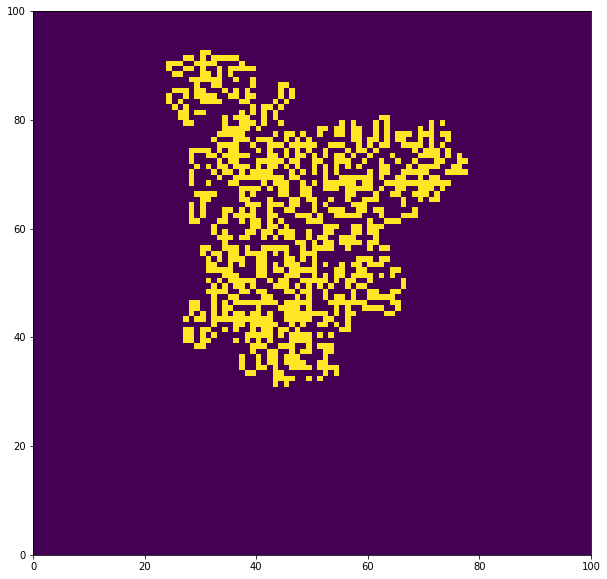

In [5]:
# Part two solution, read off image
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.pcolormesh(grid)
plt.show()